# SVM
https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
print(dir(svm.SVC))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_proba', '_compute_kernel', '_decision_function', '_dense_decision_function', '_dense_fit', '_dense_predict', '_dense_predict_proba', '_estimator_type', '_get_coef', '_get_param_names', '_pairwise', '_predict_log_proba', '_predict_proba', '_sparse_decision_function', '_sparse_fit', '_sparse_kernels', '_sparse_predict', '_sparse_predict_proba', '_validate_for_predict', '_validate_targets', '_warn_from_fit_status', 'coef_', 'decision_function', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict

In [4]:
svm.SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
print(svm.SVC.__doc__)

C-Support Vector Classification.

    The implementation is based on libsvm. The fit time complexity
    is more than quadratic with the number of samples which makes it hard
    to scale to dataset with more than a couple of 10000 samples.

    The multiclass support is handled according to a one-vs-one scheme.

    For details on the precise mathematical formulation of the provided
    kernel functions and how `gamma`, `coef0` and `degree` affect each
    other, see the corresponding section in the narrative documentation:
    :ref:`svm_kernels`.

    Read more in the :ref:`User Guide <svm_classification>`.

    Parameters
    ----------
    C : float, optional (default=1.0)
        Penalty parameter C of the error term.

    kernel : string, optional (default='rbf')
         Specifies the kernel type to be used in the algorithm.
         It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
         a callable.
         If none is given, 'rbf' will be used. If a cal

In [6]:
"""
We create an instance of SVM and fit out data.
We do not scale our data since we want to plot the support vectors
"""
# svc = svm.SVC(kernel='linear', C=1, gamma=0).fit(X, y)
svc = svm.SVC(kernel='linear', C=1).fit(X, y)

In [7]:
def plot_mesh(svc):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC with linear kernel')
    plt.show()

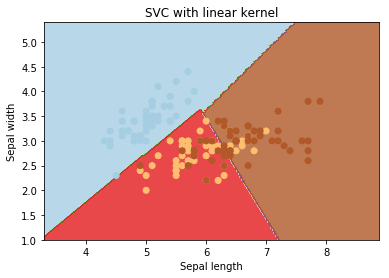

In [8]:
plot_mesh(svc)

**gamma**: Higher gamma = better training data fit
i.e. generalization error and cause over-fitting problem.

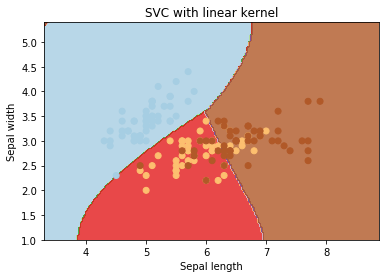

In [9]:
svc = svm.SVC(kernel='rbf', C=1).fit(X, y)
plot_mesh(svc)

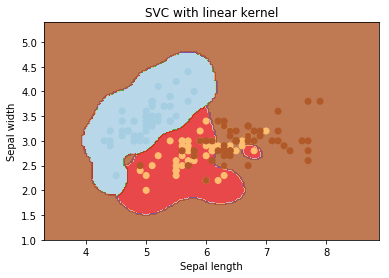

In [10]:
svc = svm.SVC(kernel='rbf', C=1, gamma=10).fit(X, y)
plot_mesh(svc)

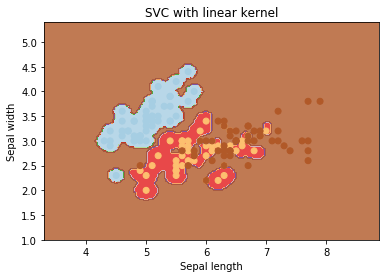

In [11]:
svc = svm.SVC(kernel='rbf', C=1, gamma=100).fit(X, y)
plot_mesh(svc)

**C**: It controls the trade off between smooth decision boundary and classifying the training points correctly

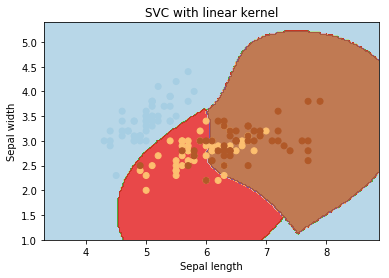

In [12]:
svc = svm.SVC(kernel='rbf', C=100).fit(X, y)
plot_mesh(svc)

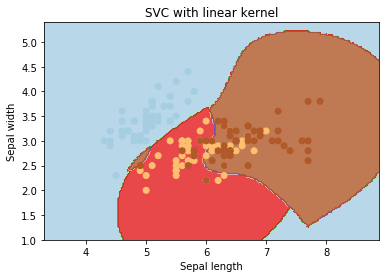

In [13]:
svc = svm.SVC(kernel='rbf', C=1000).fit(X, y)
plot_mesh(svc)